In [25]:
import pandas as pd
import sys
import os
sys.path.append("..")

data = pd.read_csv("../data/AAPL_historical_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [13]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0


In [14]:
# Function to handle missing values
def handle_missing_values(data):
    data = data.ffill()  
    return data

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [15]:
def analyze_statistics(data, columns):
    print(f"Statistics for AAPL:")
    print(data[columns].describe())

analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

Statistics for AAPL:
               Open          High           Low     Adj Close         Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     21.494496     22.312754   
std       46.003685     46.496031     45.540929     45.561916     46.037660   
min        0.049665      0.049665      0.049107      0.037857      0.049107   
25%        0.299107      0.303710      0.290179      0.241840      0.298549   
50%        0.531250      0.537946      0.522321      0.432079      0.531250   
75%       20.204196     20.389554     19.998036     17.253029     20.196160   
max      236.479996    237.229996    233.089996    234.548523    234.820007   

             Volume  
count  1.099800e+04  
mean   3.180806e+08  
std    3.354523e+08  
min    0.000000e+00  
25%    1.132545e+08  
50%    2.057412e+08  
75%    3.985275e+08  
max    7.421641e+09  


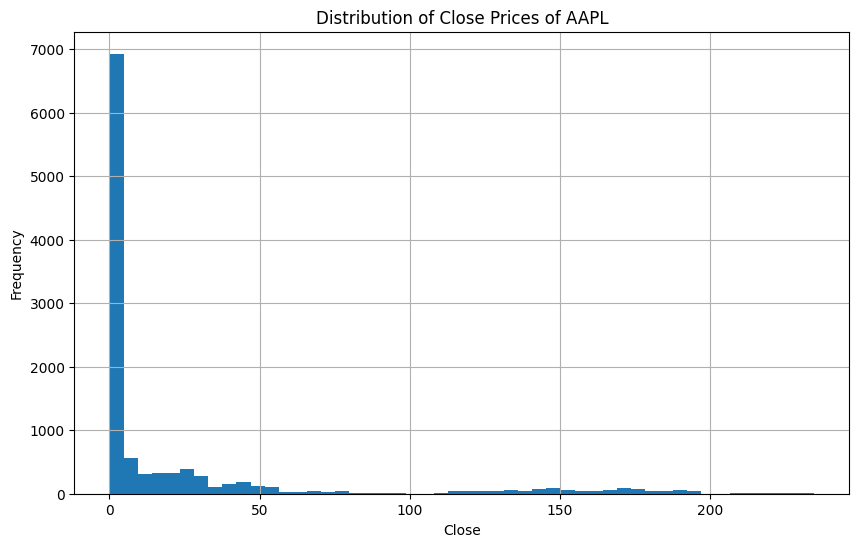

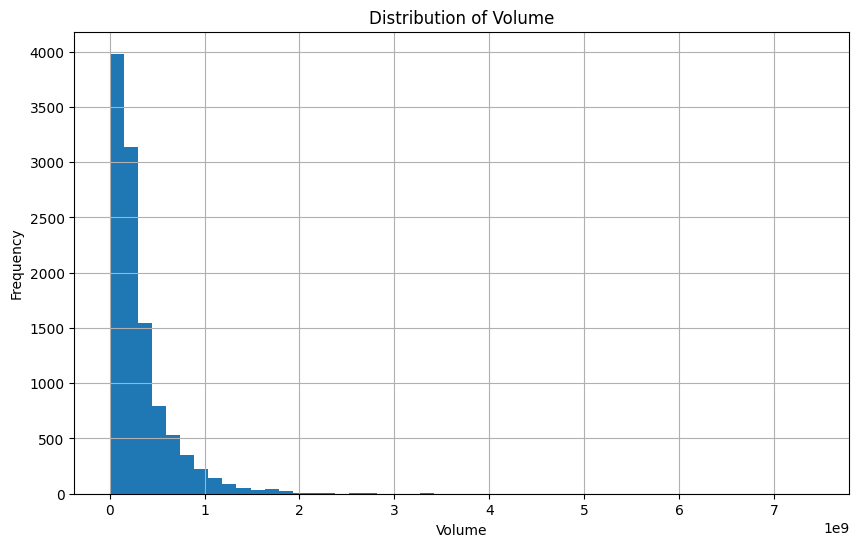

In [16]:
import matplotlib.pyplot as plt

def plot_distributions(data, column, bins=50, title="Distribution"):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_distributions(data, 'Close', title="Distribution of Close Prices of AAPL")
plot_distributions(data, 'Volume', title="Distribution of Volume")


Correlation Matrix for AAPL:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999945  0.999941   0.999667  0.999873 -0.254604
High       0.999945  1.000000  0.999925   0.999734  0.999941 -0.254235
Low        0.999941  0.999925  1.000000   0.999743  0.999942 -0.255200
Adj Close  0.999667  0.999734  0.999743   1.000000  0.999796 -0.256273
Close      0.999873  0.999941  0.999942   0.999796  1.000000 -0.254733
Volume    -0.254604 -0.254235 -0.255200  -0.256273 -0.254733  1.000000


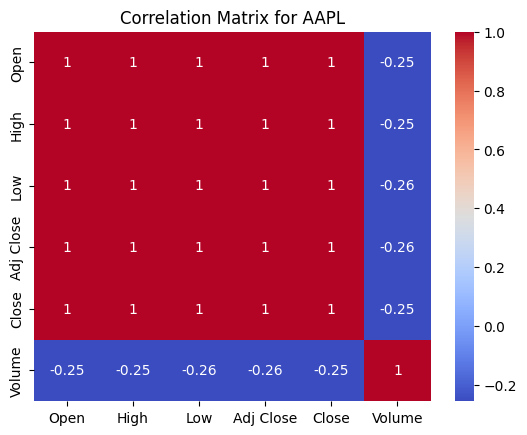

In [17]:
import seaborn as sns

def analyze_correlations(data, columns):
    correlation_matrix = data[columns].corr()
    print(f"\nCorrelation Matrix for AAPL:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for AAPL")
    plt.show()
    
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

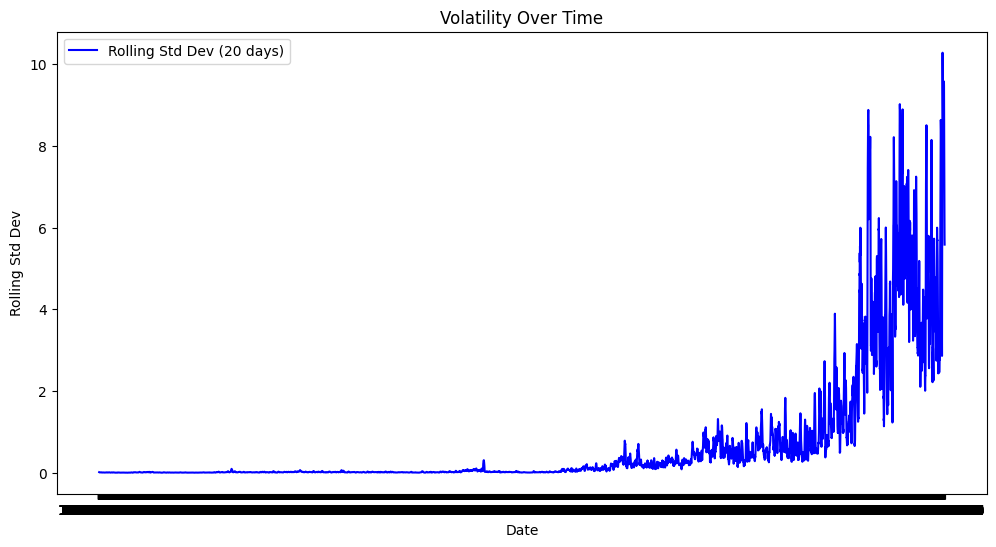

In [18]:
# Function to study volatility
def plot_volatility(data, value_col, date_col, window=20):
    data['Rolling_Std'] = data[value_col].rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data['Rolling_Std'], label=f"Rolling Std Dev ({window} days)", color='blue')
    plt.title("Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Rolling Std Dev")
    plt.legend()
    plt.show()

plot_volatility(data, 'Close', 'Date')

In [19]:
import pandas as pd
import talib as ta

import sys
import os
from IPython.display import display

# Load the stock data loader script
sys.path.append(os.path.abspath('./scripts'))
from scripts.load_stock_data import load_stock_data

# List of company names
company_names = ['AAPL']

# Dictionary to store stock data
stock_data = {}

# Load data for each company
for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')

# Define your apply_technical_indicators function
def apply_technical_indicators(df):
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                              fastperiod=12, 
                                                              slowperiod=26, 
                                                              signalperiod=9)
    return df

# Apply technical indicators to each company's data
for company, data in stock_data.items():
    stock_data[company] = apply_technical_indicators(data)

# Display the first few rows of the data for each company
for company, data in stock_data.items():
    print(f"--- {company} ---")
    display(data.head())

--- AAPL ---


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN


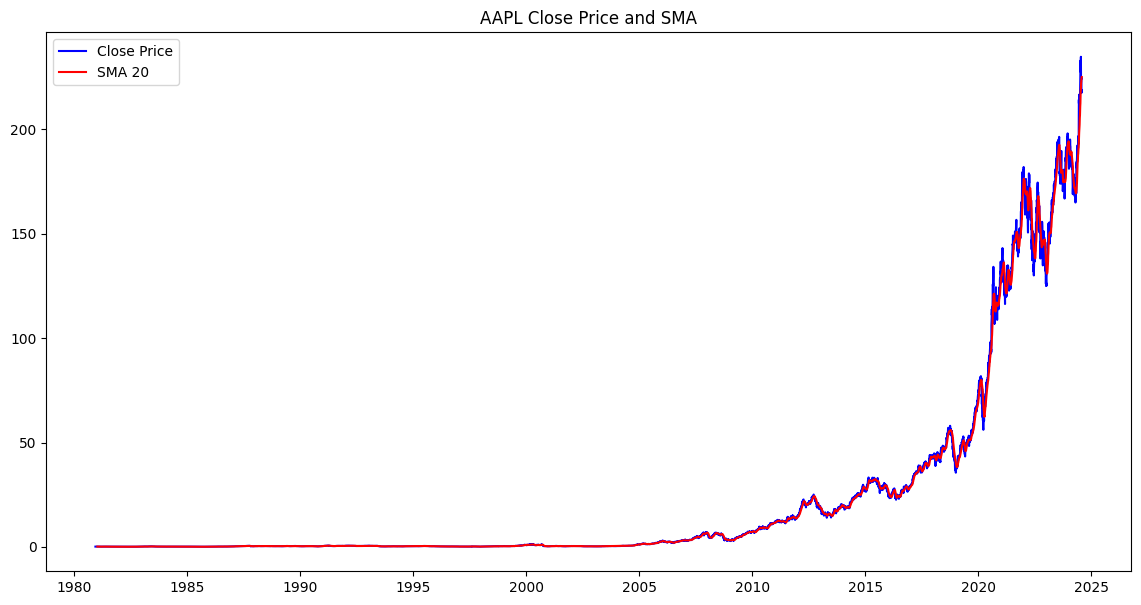

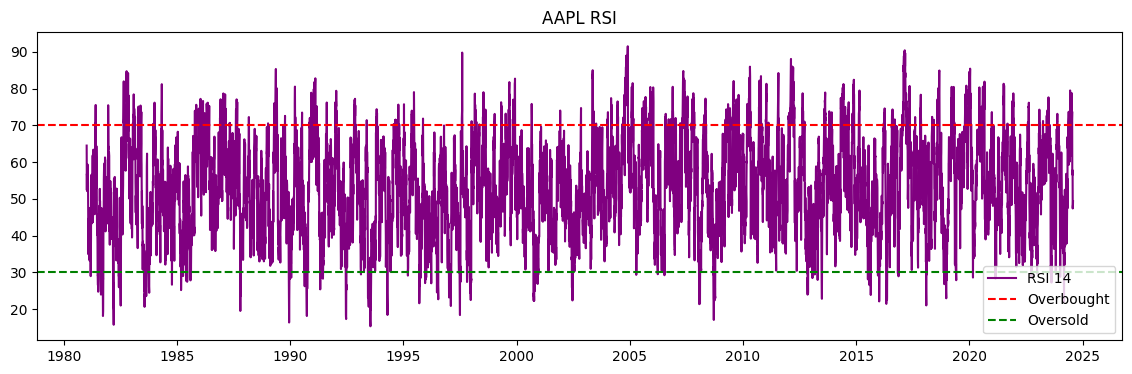

c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


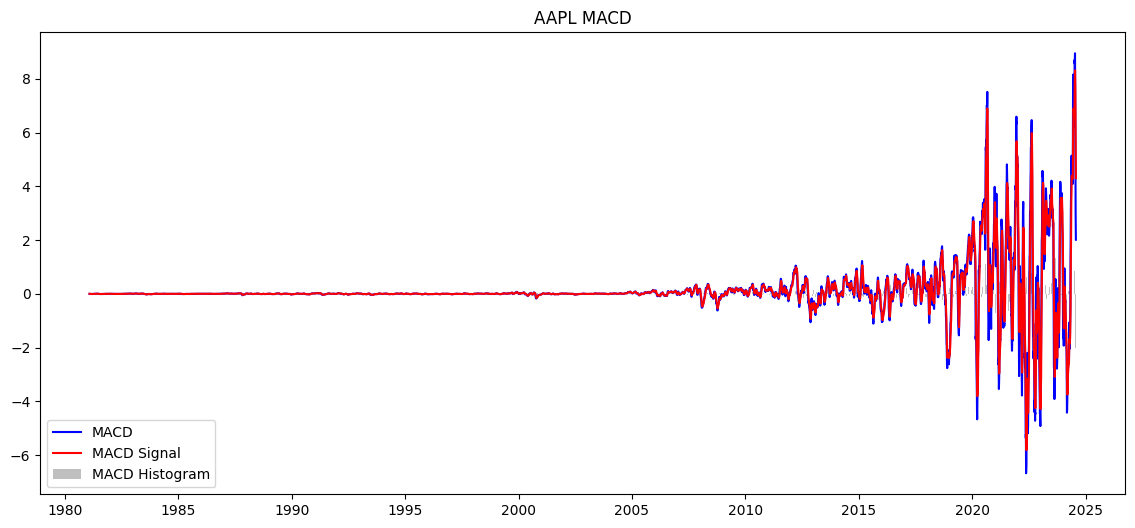

In [20]:
import matplotlib.pyplot as plt

# Choose a company to plot (e.g., 'AAPL')
company_to_plot = 'AAPL'
data = stock_data[company_to_plot]

# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='SMA 20', color='red')
plt.title(f'{company_to_plot} Close Price and SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{company_to_plot} RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title(f'{company_to_plot} MACD')
plt.legend()
plt.show()

In [22]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

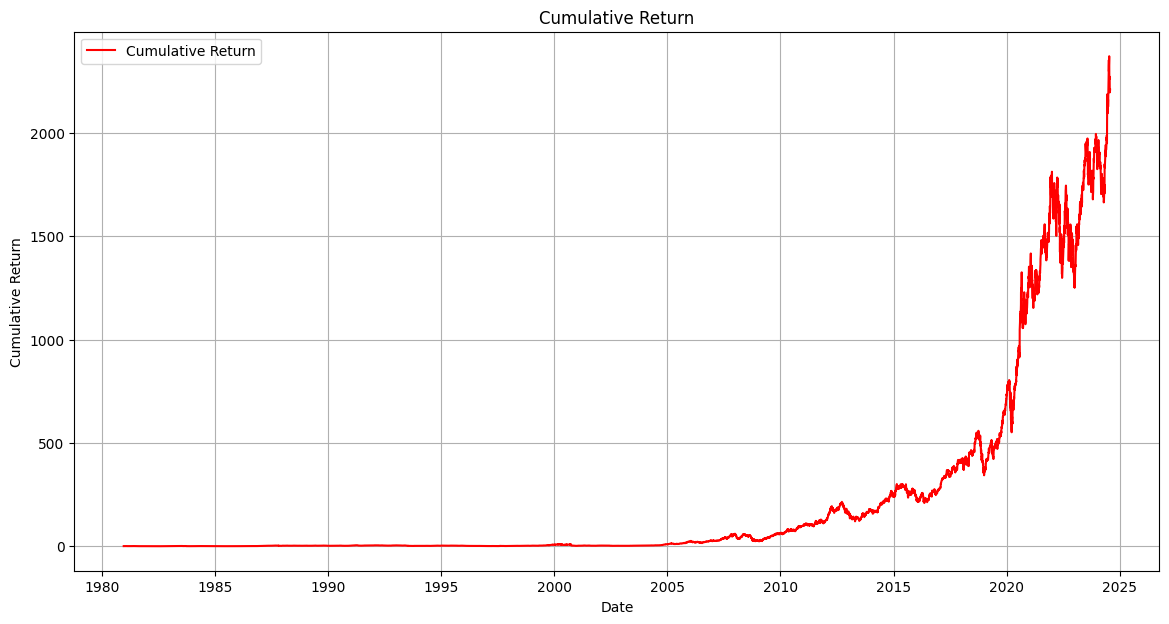

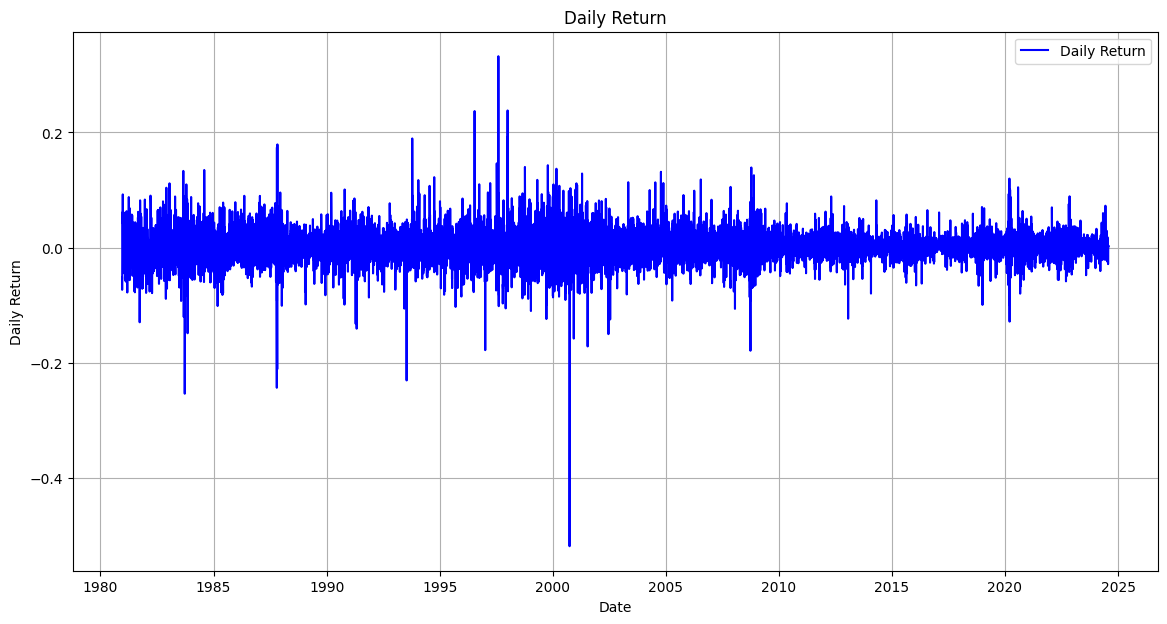

In [24]:
# Ensure 'Date' is a column and properly formatted
data.reset_index(inplace=True)  # Converts index to a column if 'Date' is in the index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure it's in datetime format

# Define the plotting function
def plot_financial_metrics(data):
    """Plot daily returns and cumulative returns."""
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='red')
    plt.title('Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
    plt.title('Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_financial_metrics(data)